# Installer Level Feature from ES: run NLP script to obtain sentiment score ( update June 25 2020) 

In [24]:
pwd

'C:\\Users\\Herbie Huang\\Google Drive\\Current_SolarResearch\\working_june2020\\solar_project\\1_code'

In [8]:
 from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Demo - use NLTK Vader to score sentiments 

In [9]:
sentences = ["VADER is smart, handsome, and funny.", # positive sentence example
...    "VADER is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
...    "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
...    "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
...    "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
...    "VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
...    "The book was good.",         # positive sentence
...    "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
...    "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
...    "A really bad, horrible book.",       # negative sentence with booster words
...    "At least it isn't a horrible book.", # negated negative sentence with contraction
...    ":) and :D",     # emoticons handled
...    "",              # an empty string is correctly handled
...    "Today sux",     #  negative slang handled
...    "Today sux!",    #  negative slang with punctuation emphasis handled
...    "Today SUX!",    #  negative slang with capitalization emphasis
...    "Today kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
... ]

In [10]:
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Herbie
[nltk_data]     Huang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
sid = SentimentIntensityAnalyzer()

In [12]:
 for sentence in sentences:
...     print(sentence)
...     ss = sid.polarity_scores(sentence)
...     for k in sorted(ss):
...         print('{0}: {1}, '.format(k, ss[k]), end='')
...     print()

VADER is smart, handsome, and funny.
compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 
VADER is smart, handsome, and funny!
compound: 0.8439, neg: 0.0, neu: 0.248, pos: 0.752, 
VADER is very smart, handsome, and funny.
compound: 0.8545, neg: 0.0, neu: 0.299, pos: 0.701, 
VADER is VERY SMART, handsome, and FUNNY.
compound: 0.9227, neg: 0.0, neu: 0.246, pos: 0.754, 
VADER is VERY SMART, handsome, and FUNNY!!!
compound: 0.9342, neg: 0.0, neu: 0.233, pos: 0.767, 
VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!
compound: 0.9469, neg: 0.0, neu: 0.294, pos: 0.706, 
The book was good.
compound: 0.4404, neg: 0.0, neu: 0.508, pos: 0.492, 
The book was kind of good.
compound: 0.3832, neg: 0.0, neu: 0.657, pos: 0.343, 
The plot was good, but the characters are uncompelling and the dialog is not great.
compound: -0.7042, neg: 0.327, neu: 0.579, pos: 0.094, 
A really bad, horrible book.
compound: -0.8211, neg: 0.791, neu: 0.209, pos: 0.0, 
At least it isn't a horrible book.
compound

In [13]:
from nltk.tokenize import sent_tokenize


## make a function to pick sent scores from multiple sentences' sent scores 
this is a bit of shortcut. We use numerical rating to assist picking one sentence whose rating are more likely to reflect the numerical rating direction 

In [16]:
def sent_score_picker_v2(row_scores,rating):
    sorted_scores=sorted(row_scores)
    highest_s=sorted_scores[-1]
    lowest_s=sorted_scores[0] 
    return highest_s if rating>=3 else lowest_s
    
    

In [17]:
test_scores=[0.0, -0.2732, 0.4767, 0.0, 0.6597, 0.6478, 0.5574, 0.5984, 0.0,-0.9]
test_scores
sorted(test_scores)

[-0.9, -0.2732, 0.0, 0.0, 0.0, 0.4767, 0.5574, 0.5984, 0.6478, 0.6597]

In [18]:
sent_score_picker_v2(test_scores,2)

-0.9

## Input: read reviews raw data from the 0_data folder , Lock_ES_RawData subfolder 

In [27]:
reviews=pd.read_csv(r'../0_data/Lock_ES_RawData/installer_review_data_20180410.csv',sep=',',escapechar='\\')


In [28]:
reviews=reviews[['id','installer_id','body','overall_rating']].dropna()

## process reviews

In [19]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import os

 

In [25]:
pwd

'C:\\Users\\Herbie Huang\\Google Drive\\Current_SolarResearch\\working_june2020\\solar_project\\1_code'

### sentiment score for the reviews

### break down paragrpahs to sentences

In [23]:
for index,row in reviews.tail().iterrows():
    row_scores=[]
    sentences=sent_tokenize(row.body)
    for sentence in sentences:
        #print(sentence)
        ss = sid.polarity_scores(sentence)
        #print(ss)
        row_scores=row_scores+[ss['compound']]
    print(len(sentences))
    print(row.body)
    print(row_scores)
    print(sent_score_picker_v2(row_scores,row.overall_rating))

4
Terrible service, difficult to deal with, waited 2 weeks to file a release of lien electronically even after being asked to speed it up. It takes a one page form and a fax number.  I would recommend any one interested in putting solar on their property to avoid getting into a contract with your local energy provider and get a battery to store your own production.  If you can't afford that, finance with a home equity loan if you can't pay up front.
[-0.6808, 0.0772, 0.6249, 0.0762]
-0.6808
12
This was our second solar installation. After moving, one of the first things we did was get quotes for a residential solar system.  We received four bids and talked to three companies. Not only did Altair offer us the best price, but we also received peace of mind that everything would be installed perfectly and that they value their customers and will do everything possible to take care of them and stand by their product.  The owner, Khaled is an electrical engineer. He is extremely knowledgeab

In [29]:
collect_sent_score=[]
for index,row in reviews.iterrows():
    row_scores=[]
    sentences=sent_tokenize(row.body)
    for sentence in sentences:
        #print(sentence)
        ss = sid.polarity_scores(sentence)
        #print(ss)
        row_scores=row_scores+[ss['compound']]
    row_sent=sent_score_picker_v2(row_scores,row.overall_rating)
    collect_sent_score=collect_sent_score+[[row.id,row_sent]]
   
    #print(len(sentences))
    #print(row.body)
    #print(row_scores)
    #print(sent_score_picker(row_scores))

In [30]:
collect_sent_score_df=pd.DataFrame(data=collect_sent_score,columns=['id','sent_score'])

In [31]:
collect_sent_score_df.head()

,id,sent_score
0,1,0.4939
1,2,0.7351
2,3,0.6893
3,4,0.7783
4,5,0.8720


In [32]:
reviews=pd.merge(left=reviews,right=collect_sent_score_df,on=['id'],how='inner')

In [33]:
reviews.head()

,id,installer_id,body,overall_rating,sent_score
0,1,494,"The so called ""Solar Assisted Air Conditioning...",1,0.4939
1,2,556,My take on solar installers is that they shoul...,5,0.7351
2,3,857,These guys are awesome. Check out even more g...,5,0.6893
3,4,20292,3/12/2013\r\nWe just had a solar system instal...,5,0.7783
4,5,857,"I highly recommend Exact Solar. Mark, the own...",5,0.8720


### Examine the correlation - 0.82

In [34]:
reviews['overall_rating'].corr(reviews['sent_score'])

0.823901017339747

## Output - reviews_sent_score_jan16_2020.csv to pipeline folder 

In [35]:
reviews.to_csv('../2_pipeline/reviews_sent_score_jan16_2020.csv')

###  Example:  the sentence by sentence score vs. the paragraph score

In [36]:
for index,row in reviews.tail().iterrows():
    row_scores=[]
    sentences=sent_tokenize(row.body)
    for sentence in sentences:
        #print(sentence)
        ss = sid.polarity_scores(sentence)
        #print(ss)
        row_scores=row_scores+[ss['compound']]
    print(len(sentences))
    print(row.body)
    print(row_scores)
    paragraph_scores=sid.polarity_scores(row.body)['compound']
    print(paragraph_scores)
    #print(sent_score_picker_v2(row_scores,row.overall_rating))

4
Terrible service, difficult to deal with, waited 2 weeks to file a release of lien electronically even after being asked to speed it up. It takes a one page form and a fax number.  I would recommend any one interested in putting solar on their property to avoid getting into a contract with your local energy provider and get a battery to store your own production.  If you can't afford that, finance with a home equity loan if you can't pay up front.
[-0.6808, 0.0772, 0.6249, 0.0762]
0.0248
12
This was our second solar installation. After moving, one of the first things we did was get quotes for a residential solar system.  We received four bids and talked to three companies. Not only did Altair offer us the best price, but we also received peace of mind that everything would be installed perfectly and that they value their customers and will do everything possible to take care of them and stand by their product.  The owner, Khaled is an electrical engineer. He is extremely knowledgeabl

### Compute: compute two versions of sentiment scores 
 - row_sent is the best score picked by sent_score_picker function, and paragraph score is the paragraph compute as a whole 

In [37]:
reviews=reviews[['id','installer_id','body','overall_rating']].dropna()

In [38]:
collect_sent_score=[]
for index,row in reviews.iterrows():
    row_scores=[]
    sentences=sent_tokenize(row.body)
    for sentence in sentences:
        #print(sentence)
        ss = sid.polarity_scores(sentence)
        #print(ss)
        row_scores=row_scores+[ss['compound']]
    row_sent=sent_score_picker_v2(row_scores,row.overall_rating)
    paragraph_score=sid.polarity_scores(row.body)['compound']
    collect_sent_score=collect_sent_score+[[row.id,row_sent,paragraph_score]]
    collect_sent_score_df=pd.DataFrame(data=collect_sent_score,columns=['id','sent_score','paragraph_score'])  
    reviews_withscore=pd.merge(left=reviews,right=collect_sent_score_df,on=['id'],how='inner')
    #print(len(sentences))
    #print(row.body)
    #print(row_scores)
    #print(sent_score_picker(row_scores))

- we see that the sent_score has good correlation with the numerical rating. The paragraph_score, the sentiment of whole paragraph, is not so good .

In [43]:
reviews_withscore['overall_rating'].corr(reviews_withscore['sent_score'])

0.823901017339747

In [44]:
reviews_withscore['overall_rating'].corr(reviews_withscore['paragraph_score'])

0.6075238017852049

## Output 2 

In [42]:
reviews_withscore.to_csv('../2_pipeline/reviews_sent_score_jan17_2020.csv')

# Visualization

In [45]:
import seaborn as sns

In [46]:
import pandas as pd 
reviews_withscore=pd.read_csv('../2_pipeline/reviews_sent_score_jan17_2020.csv')

In [47]:
reviews_withscore.head()

,Unnamed: 0,id,installer_id,body,overall_rating,sent_score,paragraph_score
0,0,1,494,"The so called ""Solar Assisted Air Conditioning...",1,0.4939,0.8788
1,1,2,556,My take on solar installers is that they shoul...,5,0.7351,0.9520
2,2,3,857,These guys are awesome. Check out even more g...,5,0.6893,0.8685
3,3,4,20292,3/12/2013\r\nWe just had a solar system instal...,5,0.7783,0.8622
4,4,5,857,"I highly recommend Exact Solar. Mark, the own...",5,0.8720,0.9865


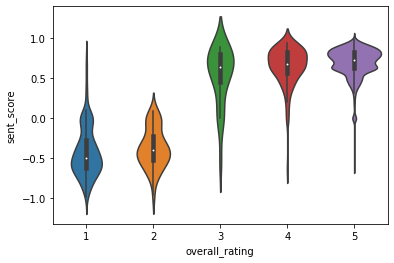

In [48]:
ax = sns.violinplot(x="overall_rating", y="sent_score", data=reviews_withscore)

- visualization of paragraph score - not so good 

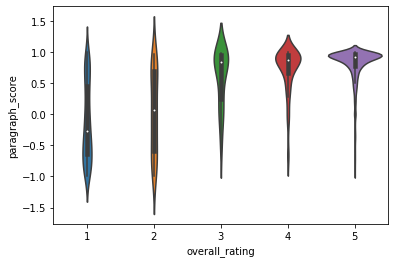

In [53]:
ax = sns.violinplot(x="overall_rating", y="paragraph_score", data=reviews_withscore)

In [49]:
reviews_withscore['Rating']=reviews_withscore['overall_rating']

In [50]:
reviews_withscore['Sentiment Score']=reviews_withscore['sent_score']

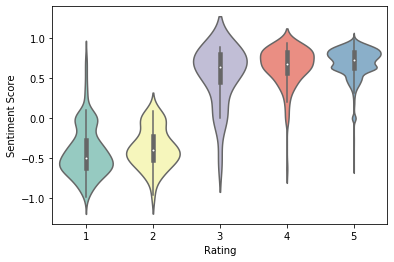

In [51]:
ax = sns.violinplot(x="Rating", y="Sentiment Score", data=reviews_withscore,scale="width", palette="Set3")

## output - visualization violin graph

In [52]:
ax.figure.savefig("../3_output/sentscore_violin.png")